In [1]:
import sys
import os
import talib 

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))




In [2]:
from src.data_loader import load_stock_data
filepath = r'C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\NVDA_historical_data.csv'
df_nvda = load_stock_data(filepath)
print(df_nvda.head())

✅ Pandas valid dates: 6421 / 6421
✅ Total valid after dateutil: 6421 / 6421
                  Date      Open      High       Low     Close  Adj Close  \
0  1999-01-22 00:00:00  0.043750  0.048828  0.038802  0.041016   0.037621   
1  1999-01-25 00:00:00  0.044271  0.045833  0.041016  0.045313   0.041562   
2  1999-01-26 00:00:00  0.045833  0.046745  0.041146  0.041797   0.038337   
3  1999-01-27 00:00:00  0.041927  0.042969  0.039583  0.041667   0.038218   
4  1999-01-28 00:00:00  0.041667  0.041927  0.041276  0.041536   0.038098   

       Volume  Dividends  Stock Splits  
0  2714688000        0.0           0.0  
1   510480000        0.0           0.0  
2   343200000        0.0           0.0  
3   244368000        0.0           0.0  
4   227520000        0.0           0.0  


In [3]:
from src.date_range import print_all_date_ranges
stock_dfs = {
    'NVDA': df_nvda
}

print_all_date_ranges(stock_dfs)

NVDA: 1999-01-22 to 2024-07-30


In [ ]:
# Assume your DataFrame is called df_news
# AAPL headline date range: 2020-03-09 to 2020-06-10

df_nvda_news = df_nvda[
    (df_nvda['Date'] >= '2011-03-03') &
    (df_nvda['Date'] <= '2020-06-10')
]


In [5]:
from src.date_range import print_all_date_ranges
stock_dfs = {
    'AAPL': df_nvda_news
}

print_all_date_ranges(stock_dfs)

AAPL: 2011-03-03 to 2020-06-10


In [6]:
from src.missing_date import find_missing_dates
missing_dates = find_missing_dates(
   df_nvda_news,
    date_col='Date',
    start_date='2020-04-27',
    end_date='2020-06-10',
    freq='D'
)

print("Missing dates:")
print(missing_dates)
print(f"Total missing: {len(missing_dates)}")

Missing dates:
DatetimeIndex(['2020-05-02', '2020-05-03', '2020-05-09', '2020-05-10',
               '2020-05-16', '2020-05-17', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-30', '2020-05-31', '2020-06-06',
               '2020-06-07'],
              dtype='datetime64[ns]', freq=None)
Total missing: 13


In [7]:
from src.missing_date import download_missing_yfinance_data

download_missing_yfinance_data(missing_dates, ticker_symbol='NVDA', show_empty=True)

$NVDA: possibly delisted; no price data found  (1d 2020-05-02 00:00:00 -> 2020-05-03 00:00:00)


No data for 2020-05-02 00:00:00


$NVDA: possibly delisted; no price data found  (1d 2020-05-03 00:00:00 -> 2020-05-04 00:00:00)


No data for 2020-05-03 00:00:00


$NVDA: possibly delisted; no price data found  (1d 2020-05-09 00:00:00 -> 2020-05-10 00:00:00)


No data for 2020-05-09 00:00:00


$NVDA: possibly delisted; no price data found  (1d 2020-05-10 00:00:00 -> 2020-05-11 00:00:00)


No data for 2020-05-10 00:00:00


$NVDA: possibly delisted; no price data found  (1d 2020-05-16 00:00:00 -> 2020-05-17 00:00:00)


No data for 2020-05-16 00:00:00


$NVDA: possibly delisted; no price data found  (1d 2020-05-17 00:00:00 -> 2020-05-18 00:00:00)


No data for 2020-05-17 00:00:00


$NVDA: possibly delisted; no price data found  (1d 2020-05-23 00:00:00 -> 2020-05-24 00:00:00)


No data for 2020-05-23 00:00:00


$NVDA: possibly delisted; no price data found  (1d 2020-05-24 00:00:00 -> 2020-05-25 00:00:00)


No data for 2020-05-24 00:00:00


$NVDA: possibly delisted; no price data found  (1d 2020-05-25 00:00:00 -> 2020-05-26 00:00:00)


No data for 2020-05-25 00:00:00


$NVDA: possibly delisted; no price data found  (1d 2020-05-30 00:00:00 -> 2020-05-31 00:00:00)


No data for 2020-05-30 00:00:00


$NVDA: possibly delisted; no price data found  (1d 2020-05-31 00:00:00 -> 2020-06-01 00:00:00)


No data for 2020-05-31 00:00:00


$NVDA: possibly delisted; no price data found  (1d 2020-06-06 00:00:00 -> 2020-06-07 00:00:00)


No data for 2020-06-06 00:00:00


$NVDA: possibly delisted; no price data found  (1d 2020-06-07 00:00:00 -> 2020-06-08 00:00:00)


No data for 2020-06-07 00:00:00


{}

In [8]:
print("Null values count per column:")
print(df_nvda.isnull().sum())


Null values count per column:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


no valuse is null. ready to go!

In [9]:
df_nvda.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,6421,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6.421000e+03,6421.000000,6421.000000
mean,2011-10-25 21:12:15.025697024,6.207884,6.320466,6.085095,6.207702,6.181334,6.060791e+08,0.000025,0.003348
min,1999-01-22 00:00:00,0.034896,0.035547,0.033333,0.034115,0.031291,1.968000e+07,0.000000,0.000000
25%,2005-06-10 00:00:00,0.277500,0.286250,0.269500,0.276750,0.253843,3.456350e+08,0.000000,0.000000
50%,2011-10-24 00:00:00,0.457250,0.464750,0.450750,0.457000,0.427637,5.070000e+08,0.000000,0.000000
75%,2018-03-13 00:00:00,4.182500,4.235750,4.116500,4.175000,4.130434,7.362000e+08,0.000000,0.000000
max,2024-07-30 00:00:00,139.800003,140.759995,132.419998,135.580002,135.580002,9.230856e+09,0.010000,10.000000
std,NaN,16.138328,16.424862,15.794914,16.118517,16.121352,4.323482e+08,0.000316,0.142397


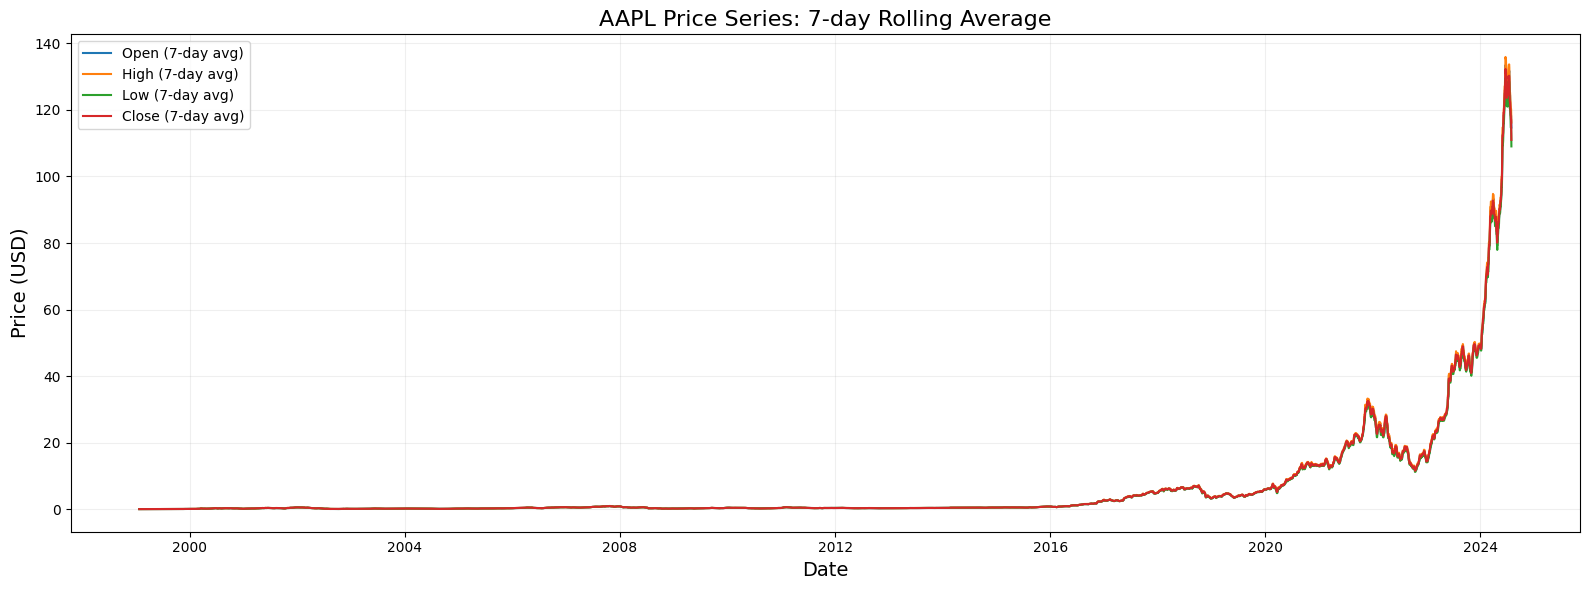

In [10]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_nvda, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("AAPL Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_ma.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'SMA_{sma_period}'] = talib.SMA(df[price_col], timeperiod=sma_period)
c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_ma.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'EMA_{ema_period}'] = talib.EMA(df[price_col], timeperiod=ema_period)


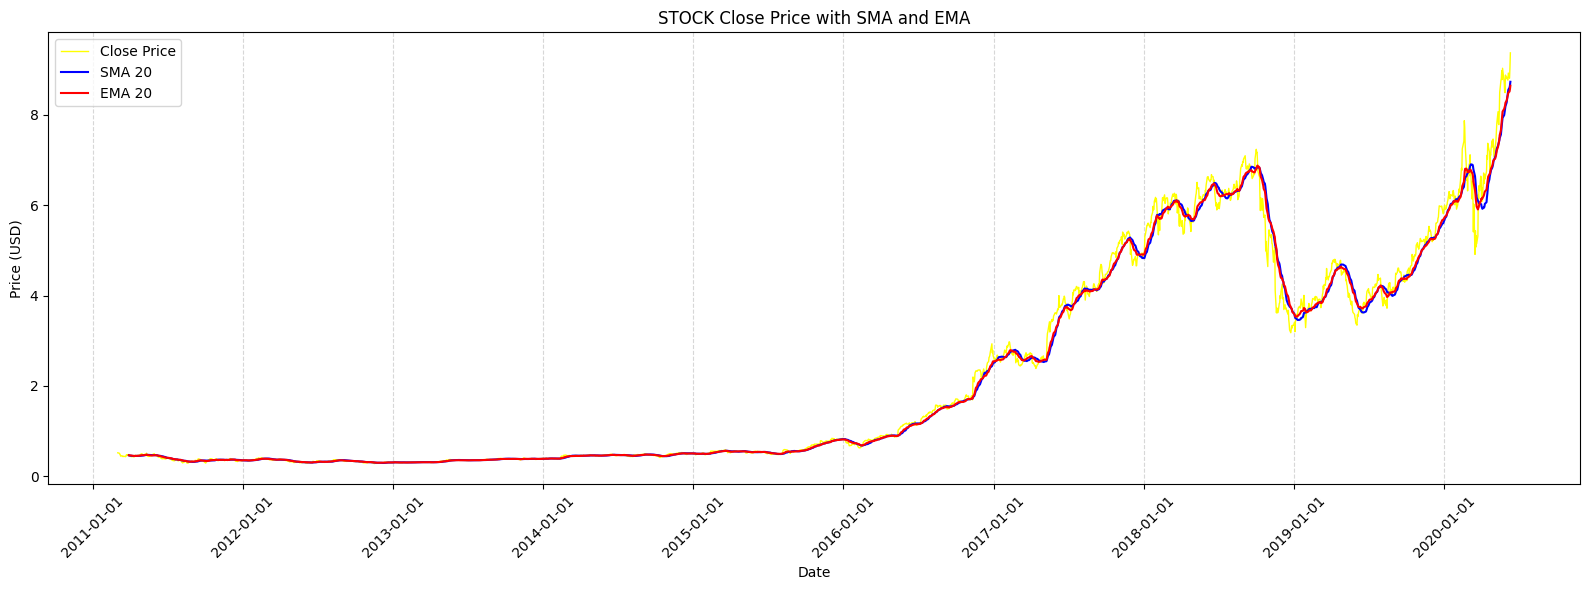

In [11]:
from src.plot_ma import plot_ma
plot_ma(df_nvda_news, 'Close')

## Interpreting Technical Indicators with TA-Lib: SMA, EMA, and Price Trend

The graph above overlays three key lines for AAPL stock:
- **Close Price** (black): The actual market closing price of AAPL for each trading day.
- **SMA 20** (blue): The 20-day Simple Moving Average, which calculates the unweighted average of the previous 20 closing prices for each point in time.
- **EMA 20** (red): The 20-day Exponential Moving Average, which is similar to the SMA but gives more weight to recent prices, making it more responsive to new market information.

**TA-Lib** is a widely-used library for financial technical analysis. It computes indicators like SMA and EMA, which traders and analysts use to understand price trends, identify potential buy or sell signals, and smooth out short-term volatility in market data.

##### Both the SMA and EMA are trending up, confirming a bullish trend.

The lines stay in order: yellow (price) > red (EMA) > blue (SMA), a classic sign of a strong and established uptrend.

**Signals:**
When the price crosses above the moving averages, it’s often seen as a “buy” signal.
When it’s below, it’s a “sell” signal.

**Momentum:**
The bigger the gap between the yellow line and the moving averages, the stronger the trend (but sometimes this can mean the stock is “overbought” and may pull back soon).


### Key Insights from the Plot:
1. **Early Period (Left Side, March)**
The yellow line is dropping, meaning the stock price is falling.

Both moving averages (blue and red) follow the price down but react more slowly (they “smooth out” the ups and downs).

The SMA (blue) is a little slower and “smoother,” while the EMA (red) starts to turn up a bit earlier as prices bottom out.

2. **Middle Period (April–May)**
The stock price stops falling and starts rising steadily.

The moving averages begin to turn upward as well.

You can see the red EMA moves up slightly before the blue SMA—it’s more responsive.

The closing price (yellow) stays above both moving averages for most of this period, indicating a clear uptrend.

3. **Late Period (May–June)**
The yellow line continues climbing, and the gap between the closing price and the averages grows, showing strong upward momentum.


**In summary:** This visualization, powered by TA-Lib’s moving average calculations, allows you to detect overall trend direction, identify potential turning points, and gain a clearer view of price momentum for informed decision-making.


c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_rsi.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rsi_col] = talib.RSI(df[price_col], timeperiod=rsi_period)


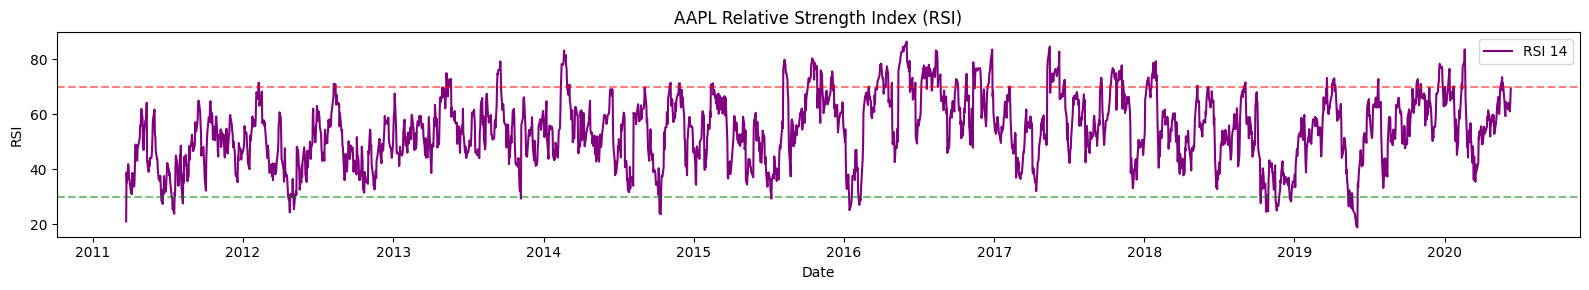

In [ ]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_nvda_news, price_col='Close', ticker_name='ANVDA')




## Interpreting the Relative Strength Index (RSI) with TA-Lib

The graph above visualizes the **14-day Relative Strength Index (RSI)** for AAPL, a momentum oscillator computed by TA-Lib. RSI is a popular indicator used by traders to measure the speed and magnitude of recent price changes.

- **RSI 14 (purple line):** This shows the relative strength over a 14-day period, ranging from 0 to 100.
- **Overbought threshold (red dashed line at 70):** When the RSI is above 70, it signals that the stock may be overbought or overvalued, and a price correction or pullback could be imminent.
- **Oversold threshold (green dashed line at 30):** When the RSI is below 30, it suggests that the stock may be oversold or undervalued, indicating a possible rebound or buying opportunity.

### Key Insights from the RSI Plot:

**April – Early May:**

RSI climbs gradually from about 45 to the high 50s/60s.

This means the stock was gaining strength, but not yet **“overbought.”**

**Mid-May – Early June:**

RSI stays mostly between 60 and 70, showing the stock is strong but not crazy high.

Close to **“overbought”** but still in the **“healthy uptrend”** range.

**Early June Onward:**

RSI crosses above 70—now officially in the **“overbought”** zone.

**End of chart:** RSI jumps to nearly 80, a sign the stock **has been really strong** for a while.


**Signal detection:**

When RSI crosses above 70 → mark as “potential overbought” (maybe risky to buy more here).

When RSI crosses below 30 (not shown here) → mark as “potential oversold.”




c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_macd.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[macd_col] = macd
c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_macd.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[signal_col] = signal
c:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\src\plot_macd.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

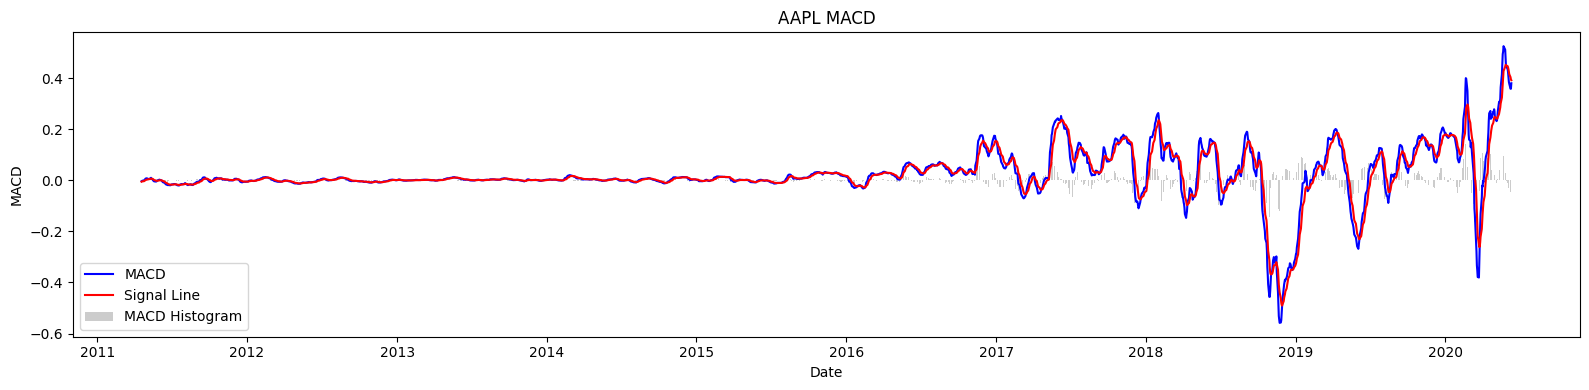

In [ ]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_nvda_news, price_col='Close', ticker_name='NVDA')

## Interpreting the MACD Indicator with TA-Lib
What is MACD?
MACD (Moving Average Convergence Divergence) is a technical indicator used to spot trends and momentum in a stock’s price.

The chart has:

Blue line: The MACD value itself (difference between two moving averages of price)

Red line: The Signal Line (a moving average of the MACD)

Gray bars: The MACD Histogram (shows the difference between MACD and Signal Line; bigger bars = bigger momentum)

What Does Your Chart Show?
1. Early Period (April–May)
Blue MACD line is rising above the red Signal line.

This is a bullish signal: It suggests the stock’s upward momentum is getting stronger.

Gray bars (histogram) are above zero and growing.

This means the distance between MACD and Signal Line is widening, so the uptrend is getting stronger.

2. Mid-May
The blue MACD line stays above the red Signal line, but they start to get closer.

The gray bars (histogram) shrink, meaning momentum is slowing, but it’s still positive.

No bearish sign yet, just less strong momentum.

3. Late May – Early June
The blue MACD line drops slightly, nearly touching the red Signal line.

Histogram bars are near zero: momentum is weak, trend is pausing.

No real “sell” signal, just a break in strong upward momentum.

4. Mid-June
Blue MACD line turns up again, rising above the red Signal line.

Gray bars grow again: bullish momentum is back.